# **Introduction to LRFM analysis**

Di ranah pemasaran dan analisis berbasis data, bisnis selalu mencari cara untuk memahami dan memanfaatkan perilaku pelanggan untuk mendorong pertumbuhan dan profitabilitas. Salah satu alat yang kuat dalam upaya ini adalah length, recency, frequency, and monetary (LRFM) analysis.

Analisis RFM berfokus pada segmentasi pelanggan berdasarkan loyalitas, aktivitas pembelian terbaru, frekuensi transaksi, dan nilai moneter.

Dengan memahami perilaku kelompok pelanggan  melalui segmentasi pelanggan berdasarkan length, recency, frequency, dan nilai moneter, teknik analisis ini akan memainkan peran penting dalam mendorong kesuksesan pemasaran di era persaingan yang ketat saat ini.
___

In [ ]:
# data manipulation
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **1. What is LRFM Analysis?**

LRFM Analysis adalah teknik segmentasi pelanggan yang mirip dengan RFM (Recency, Frequency, Monetary), tetapi dengan penambahan dimensi baru, yaitu Length. LRFM adalah singkatan dari:

`L (Length):` Mengukur durasi atau panjang hubungan antara pelanggan dan perusahaan, biasanya dihitung sebagai selisih antara tanggal pembelian pertama dan terakhir. Indikator ini menunjukkan loyalitas atau kesetiaan jangka panjang pelanggan terhadap merek atau produk.

`R (Recency):` Mengukur seberapa baru atau terkini transaksi terakhir yang dilakukan oleh pelanggan. Semakin kecil nilainya, semakin baru transaksi tersebut, yang menunjukkan bahwa pelanggan masih aktif.

`F (Frequency):` Mengukur seberapa sering pelanggan melakukan transaksi dalam periode waktu tertentu. Pelanggan yang sering bertransaksi cenderung lebih loyal.

`M (Monetary):` Mengukur total nilai atau jumlah uang yang dihabiskan oleh pelanggan selama periode waktu tertentu. Semakin tinggi nilainya, semakin berharga pelanggan tersebut bagi perusahaan.

## **2. Why is it valuable?**

Terdapat beberapa kegunaan dari LRFM analysis diantaranya:

`Segmentasi Pelanggan`: Mengelompokkan pelanggan berdasarkan perilaku mereka, sehingga memudahkan dalam penyesuaian strategi pemasaran dan penawaran produk.

`Peningkatan Loyalitas`: Dengan menambahkan dimensi Length, perusahaan bisa lebih fokus pada pelanggan dengan hubungan jangka panjang, yang bisa membantu dalam pengembangan program loyalitas.

`Retensi Pelanggan`: Identifikasi pelanggan yang berisiko tidak kembali dan pengembangan strategi retensi yang lebih efektif.

## **3. LRFM Analysis with Python**

Selanjutnya kita akan coba mempraktikan cara membuat analisis LRFM di Python.

In [ ]:
df = pd.read_csv(
    'lrfm_analysis.csv',
    parse_dates=['InvoiceDate'],        # mengubah kolom InvoiceDate menjadi datetimes
    dtype={'CustomerID':str}            # mengubah kolom CustomerID menjadi string
)
df.sample(10, random_state=42)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47403,545819,21175,GIN + TONIC DIET METAL SIGN,2,2011-07-03 12:31:00,2.55,16356,United Kingdom
336821,577479,23265,SET OF 3 WOODEN TREE DECORATIONS,12,2011-11-20 11:34:00,1.25,14911,EIRE
307418,574720,72232,FENG SHUI PILLAR CANDLE,12,2011-06-11 14:39:00,0.19,14547,United Kingdom
376215,581169,22804,PINK HANGING HEART T-LIGHT HOLDER,6,2011-07-12 14:54:00,2.95,16779,United Kingdom
160692,559934,21903,MAN FLU METAL SIGN,12,2011-07-14 09:58:00,2.10,13012,United Kingdom
135725,556814,23133,LARGE IVORY HEART WALL ORGANISER,2,2011-06-15 08:34:00,8.25,14852,United Kingdom
150952,558750,23208,LUNCH BAG VINTAGE LEAF DESIGN,20,2011-03-07 10:47:00,1.65,18226,United Kingdom
361562,579712,23215,JINGLE BELL HEART ANTIQUE SILVER,4,2011-11-30 14:17:00,2.08,15467,United Kingdom
4896,540524,22082,RIBBON REEL STRIPES DESIGN,5,2011-09-01 12:53:00,1.65,16735,United Kingdom
377654,581376,22633,HAND WARMER UNION JACK,6,2011-08-12 12:43:00,2.10,14719,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379979 entries, 0 to 379978
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379979 non-null  object        
 1   StockCode    379979 non-null  object        
 2   Description  379979 non-null  object        
 3   Quantity     379979 non-null  int64         
 4   InvoiceDate  379979 non-null  datetime64[ns]
 5   UnitPrice    379979 non-null  float64       
 6   CustomerID   379979 non-null  object        
 7   Country      379979 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 23.2+ MB


Perhatikan bahwa kita menggunakan `parse_dates` untuk mengubah **InvoiceDate** dari object menjadi datetime. Kemudian kita juga menggunakan `dtype` untuk mengubah **CustomerID** dari integer menjadi object.

Selanjutnya kita akan membuat analisis LRFM dalam beberapa langkah.

### `1. Calculate LRFM values`

Sekarang mari kita hitung nilai length, recency, frequency dan monetary.

### `Length & Recency`

Seperti yang sudah dijelaskan pada bagian sebelumnya, length akan mengukur durasi hubungan antara customer dan perusahaan sedangkan recency akan melihat berapa lama waktu customer dalam melakukan transaksi terakhirnya. Oleh karena itu untuk mendapatkan nilai length dan recency, perlu diketahui terlebih dahulu tanggal terakhir customer melakukan transaksi. Sebagai asumsi, hari analisis diperoleh dari hari terakhir transaksi + 1.

In [ ]:
import datetime

analysis_date = df['InvoiceDate'].max() + datetime.timedelta(1)
analysis_date

Timestamp('2011-12-11 17:19:00')

Langkah selanjutnya menghitung length dan recency dari tiap customer.

In [ ]:
df_length_recency = df.groupby('CustomerID').agg(
    length=('InvoiceDate', lambda x: (analysis_date - x.min()).days), # Dari dia pertama kali daftar / menggunakan sampai analisis ini dilakukan (Dalam bentuk Hari)
    recency=('InvoiceDate', lambda x: (analysis_date - x.max()).days), # Dari dia terakhir kali menggukana sampai analisis ini dilakukan (Dalam bentuk Hari)
)

df_length_recency.sample(5, random_state=42)

,length,recency
CustomerID,,
15110,320,25
17655,286,12
18200,107,107
12573,229,229
15797,321,97


Apabila dilihat dari hasil tabel diatas, diketahui bahwa customer dengan CustomerID 15797 sudah bergabung sejak 321 hari yang lalu sedangkan CustomerID 18200 baru bergabung 107 hari yang lalu. Dari segi recency, CustomerID 12573 terakhir berbelanja 229 hari yang lalu. Artinya customer 12573 sudah cukup lama tidak berbelanja pada toko tersebut. Sedangkan customer 17655 baru 12 hari yang lalu melakukan transaksi terakhir, artinya customer ini cukup baru dalam berbelanja di toko tersebut.

### `Frequency`
Untuk mengetahui seberapa sering customer melakukan transaksi, dapat dianalisa dari nilai frekuensi pembelanjaan dari masing-masing customer.

In [ ]:
df_frequency = df.groupby('CustomerID').agg(
    frequency=('InvoiceNo', lambda x: x.nunique())
)

df_frequency.sample(5, random_state=42)

,frequency
CustomerID,
15110,7
17655,6
18200,1
12573,1
15797,4


Kita mengetahui bahwa Customer 12573 telah cukup lama bergabung di toko ini, namun jika dilihat dari frekuensinya, pelanggan ini hanya berbelanja sebanyak satu kali, sehingga dapat dikatakan frekuensinya sangat rendah. Berbeda dengan customer 17655 yang lebih sering berbelanja, terlihat dari jumlah transaksi yang telah dilakukan sebanyak enam kali di toko ini.

### `Monetary`

Selanjutnya, monetary mengukur seberapa besar pengeluaran pelanggan dalam setiap transaksi. Nilai monetary dapat dihitung dari hasil perkalian antara harga barang yang dibeli dengan jumlah barang yang dibeli dalam satu kali transaksi. Untuk itu, kita akan membuat kolom TotalPrice terlebih dahulu, yang menunjukkan hasil perkalian antara UnitPrice dan Quantity.

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.sample(5, random_state=42)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
47403,545819,21175,GIN + TONIC DIET METAL SIGN,2,2011-07-03 12:31:00,2.55,16356,United Kingdom,5.10
336821,577479,23265,SET OF 3 WOODEN TREE DECORATIONS,12,2011-11-20 11:34:00,1.25,14911,EIRE,15.00
307418,574720,72232,FENG SHUI PILLAR CANDLE,12,2011-06-11 14:39:00,0.19,14547,United Kingdom,2.28
376215,581169,22804,PINK HANGING HEART T-LIGHT HOLDER,6,2011-07-12 14:54:00,2.95,16779,United Kingdom,17.70
160692,559934,21903,MAN FLU METAL SIGN,12,2011-07-14 09:58:00,2.10,13012,United Kingdom,25.20


Langkah selanjutnya adalah menjumlahkan TotalPrice dari masing-masing customer.

In [ ]:
df_monetary = df.groupby('CustomerID').agg(
    monetary=('TotalPrice', 'sum'),
)

df_monetary.sample(5, random_state=42)

,monetary
CustomerID,
15110,970.25
17655,1962.84
18200,163.80
12573,160.54
15797,2207.40


Kembali ke customer 12573, pelanggan ini hanya pernah melakukan satu kali transaksi, dan sudah lama sekali tidak melakukan transaksi kembali. Selain itu, nilai transaksi tersebut pun relatif kecil, yaitu sebesar $160.54. Sementara itu, customer 17655 memiliki total pengeluaran sebesar $1962.84 dari enam transaksi yang dilakukan.

Selanjutnya, semua informasi yang sudah diperoleh, yaitu length, recency, frequency, dan monetary, akan digabungkan dalam satu dataframe untuk memudahkan analisis segmentasi customer.

In [ ]:
df_customer = df.groupby('CustomerID').agg(
    length=('InvoiceDate', lambda x: (analysis_date - x.min()).days),
    recency=('InvoiceDate', lambda x: (analysis_date - x.max()).days),
    frequency=('InvoiceNo', lambda x: x.nunique()),
    monetary=('TotalPrice', 'sum'),
)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary
CustomerID,,,,
15110,320,25,7,970.25
17655,286,12,6,1962.84
18200,107,107,1,163.80
12573,229,229,1,160.54
15797,321,97,4,2207.40


Berikut penjelasan dari masing-masing variabel diatas:

| Variable | Description |
| --- | --- |
| customerID | ID customer|
| length | Usia customer, diperoleh dari selisih hari pertama bertransaksi dengan hari analisis |
| recency | Selisih hari terakhir bertransaksi dengan hari analisis |
| frequency | Jumlah transaksi yang dilakukan oleh customer |
| monetary | Besar pengeluaran yang dilakukan oleh customer |

### `2. Assigning Scores`

Selanjutnya kita akan menentukan skor dengan metode berikut:
- Rule Based: *Frequency*
- Statistical Approach: *Length, Recency,* dan *Monetary*

**Length Segmentation**

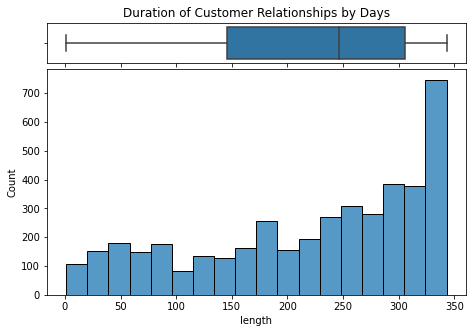

0.00      1.0
0.25    146.0
0.50    246.0
0.75    306.0
1.00    343.0
Name: length, dtype: float64

In [ ]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='length', ax=ax_top)
sns.histplot(data=df_customer, x='length', ax=ax_bot)

ax_top.set(
    title='Duration of Customer Relationships by Days'
)

plt.show()
display(df_customer['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan length-nya ke dalam 4 kelompok yaitu :
- 4 (Veteran) : telah bergabung lebih dari 306 hari
- 3 (Established) : telah bergabung antara 246 hingga 306 hari terakhir
- 2 (Acquainted) : telah bergabung antara 146 hingga 246 hari terakhir
- 1 (Newcomer) : baru bergabung antara 1 hingga 146 hari terakhir

In [ ]:
df_customer['l_score'] = pd.qcut(
    df_customer['length'],              # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk length: semakin lama, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score
CustomerID,,,,,
15110,320,25,7,970.25,4
17655,286,12,6,1962.84,3
18200,107,107,1,163.80,1
12573,229,229,1,160.54,2
15797,321,97,4,2207.40,4


**Recency Segmentation**

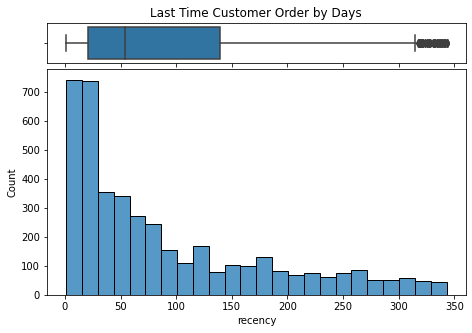

0.00      1.0
0.25     21.0
0.50     54.0
0.75    139.0
1.00    343.0
Name: recency, dtype: float64

In [ ]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='recency', ax=ax_top)
sns.histplot(data=df_customer, x='recency', ax=ax_bot)

ax_top.set(
    title='Last Time Customer Order by Days'
)

plt.show()
display(df_customer['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 21 hari terakhir
- 3 (Warm) : melakukan transaksi antara 21 hingga 54 hari terakhir
- 2 (Cold) : melakukan transaksi antara 54 hingga 139 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 139 hari terakhir

In [ ]:
df_customer['r_score'] = pd.qcut(
    df_customer['recency'],             # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[4, 3, 2, 1]                 # pelabelan, untuk recency: semakin kecil, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score
CustomerID,,,,,,
15110,320,25,7,970.25,4,3
17655,286,12,6,1962.84,3,4
18200,107,107,1,163.80,1,2
12573,229,229,1,160.54,2,1
15797,321,97,4,2207.40,4,2


**Frequency Segmentation**

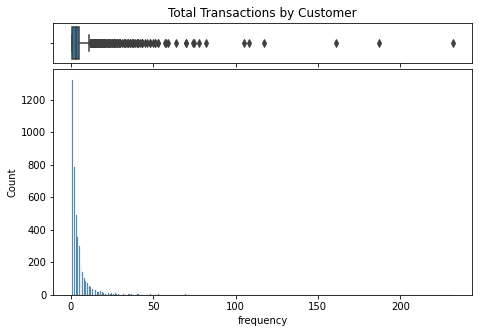

0.00      1.0
0.25      1.0
0.50      3.0
0.75      5.0
1.00    232.0
Name: frequency, dtype: float64

In [ ]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='frequency', ax=ax_top)
sns.histplot(data=df_customer, x='frequency', ax=ax_bot)

ax_top.set(
    title='Total Transactions by Customer'
)

plt.show()
display(df_customer['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan frequency-nya ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 5 kali
- 3 (High) : melakukan transaksi 4 hingga 5 kali
- 2 (Medium) : melakukan transaksi 2 hingga 3 kali
- 1 (Low) : melakukan transaksi hanya 1 kali.

In [ ]:
def f_score(x):
    if x==1:
        return 1
    elif x <= 3:
        return 2
    elif x <= 5:
        return 3
    else:
        return 4

df_customer['f_score'] = df_customer['frequency'].apply(f_score)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score
CustomerID,,,,,,,
15110,320,25,7,970.25,4,3,4
17655,286,12,6,1962.84,3,4,4
18200,107,107,1,163.80,1,2,1
12573,229,229,1,160.54,2,1,1
15797,321,97,4,2207.40,4,2,3


**Monetary Segmentation**

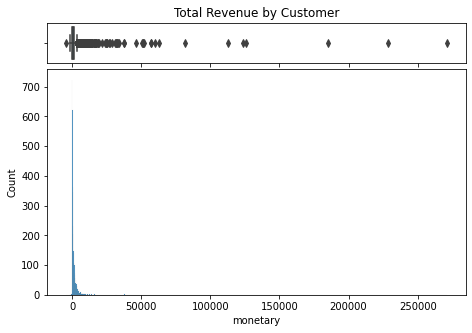

0.00     -4287.630
0.25       290.955
0.50       642.485
0.75      1563.750
1.00    270897.140
Name: monetary, dtype: float64

In [ ]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer, x='monetary', ax=ax_top)
sns.histplot(data=df_customer, x='monetary', ax=ax_bot)

ax_top.set(
    title='Total Revenue by Customer'
)

plt.show()
display(df_customer['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Spender) : melakukan transaksi lebih dari 1563.75 dollar
- 3 (High Spender) : melakukan transaksi antara 642.48 hingga 1563.75 dollar
- 2 (Medium Spender) : melakukan transaksi antara 290.95 hingga 642.48 dollar
- 1 (Low Spender) : melakukan transaksi kurang dari dari 290.95 dollar

In [ ]:
df_customer['m_score'] = pd.qcut(
    df_customer['monetary'],            # data
    q=4,                                # dibagi menjadi 4 kelompok sama banyak
    labels=[1, 2, 3, 4]                 # pelabelan, untuk monetary: semakin besar, maka semakin besar skornya
).astype(int)

df_customer.sample(5, random_state=42)


,length,recency,frequency,monetary,l_score,r_score,f_score,m_score
CustomerID,,,,,,,,
15110,320,25,7,970.25,4,3,4,3
17655,286,12,6,1962.84,3,4,4,4
18200,107,107,1,163.80,1,2,1,1
12573,229,229,1,160.54,2,1,1,1
15797,321,97,4,2207.40,4,2,3,4


### `3. Labelling Segment`

Selanjutnya kita akan melakukan customer segmentation dengan berbagai cara yang berbeda:
- Total Score Approach
- Combining Individual Scores Approach
- K-Means Clustering


**a. Total Score Approach**

Pada tahapan ini kita akan menjumlahkan l_score, r_score, f_score, dan m_score menjadi rfm_score_total

In [ ]:
df_customer['lrfm_score_total'] = df_customer['l_score'] + df_customer['r_score'] + df_customer['f_score'] + df_customer['m_score']
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total
CustomerID,,,,,,,,,
15110,320,25,7,970.25,4,3,4,3,14
17655,286,12,6,1962.84,3,4,4,4,15
18200,107,107,1,163.80,1,2,1,1,5
12573,229,229,1,160.54,2,1,1,1,5
15797,321,97,4,2207.40,4,2,3,4,13


Lalu kita akan kelompokkan kedalam 4 segmen dengan ketentuan berikut:

In [ ]:
def segmentation_by_total(x):
    if x <= 7:
        return 'Bronze'
    elif x <= 11:
        return 'Silver'
    elif x <= 13:
        return 'Gold'
    else:
        return 'Platinum'

df_customer['lrfm_segment_total'] = df_customer['lrfm_score_total'].apply(segmentation_by_total)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_segment_total
CustomerID,,,,,,,,,,
15110,320,25,7,970.25,4,3,4,3,14,Platinum
17655,286,12,6,1962.84,3,4,4,4,15,Platinum
18200,107,107,1,163.80,1,2,1,1,5,Bronze
12573,229,229,1,160.54,2,1,1,1,5,Bronze
15797,321,97,4,2207.40,4,2,3,4,13,Gold


Kita akan coba tampilkan karakteristik dari setiap segment dalam bentuk visualisasi sebagai berikut:

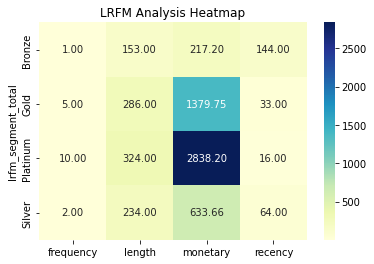

In [ ]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_total', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [ ]:
import plotly.express as px

color_map = {'Bronze' : 'brown', 'Silver' : 'gray', 'Gold' : 'orange', 'Platinum' : 'red'}

fig = px.scatter_3d(
    df_customer,
    x='recency',
    y='frequency',
    z='monetary',
    color='lrfm_segment_total',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")


**b. Combining Individual Scores Approach**

Pada tahapan ini kita akan menggabungkan l_score, r_score, f_score, dan m_score menjadi lrfm_score_combined

In [ ]:
df_customer['lrfm_score_combined'] = df_customer['l_score'].astype(str) + df_customer['r_score'].astype(str) + df_customer['f_score'].astype(str) + df_customer['m_score'].astype(str)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_segment_total,lrfm_score_combined
CustomerID,,,,,,,,,,,
15110,320,25,7,970.25,4,3,4,3,14,Platinum,4343
17655,286,12,6,1962.84,3,4,4,4,15,Platinum,3444
18200,107,107,1,163.80,1,2,1,1,5,Bronze,1211
12573,229,229,1,160.54,2,1,1,1,5,Bronze,2111
15797,321,97,4,2207.40,4,2,3,4,13,Gold,4234


Lalu kita akan kelompokkan kedalam 4 segmen dengan ketentuan berikut:

In [ ]:
seg_map = {
    r'[1-2][1-4][1-4][1-2]': 'New Cust Low Value',
    r'[1-2][1-4][1-4][3-4]': 'New Cust High Value',
    r'[3-4][1-2][1-2][1-2]': 'Old Cust Inactive',
    r'[3-4][1-2][1-4][1-4]': 'At Risk',
    r'[3-4][1-2][3-4][3-4]': 'Need Attention',
    r'[3-4][3-4][3-4][3-4]': 'Loyal Cust',
    r'[3-4][3-4][3-4][1-2]': 'Potensial Loyal Cust',
    r'[3-4][3-4][1-2][1-4]': 'Reactivated Old Cust'
}

df_customer['lrfm_segment_combined'] = df_customer['lrfm_score_combined'].replace(seg_map, regex=True)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_segment_total,lrfm_score_combined,lrfm_segment_combined
CustomerID,,,,,,,,,,,,
15110,320,25,7,970.25,4,3,4,3,14,Platinum,4343,Loyal Cust
17655,286,12,6,1962.84,3,4,4,4,15,Platinum,3444,Loyal Cust
18200,107,107,1,163.80,1,2,1,1,5,Bronze,1211,New Cust Low Value
12573,229,229,1,160.54,2,1,1,1,5,Bronze,2111,New Cust Low Value
15797,321,97,4,2207.40,4,2,3,4,13,Gold,4234,At Risk


Kita akan coba tampilkan karakteristik dari setiap segment dalam bentuk visualisasi sebagai berikut:

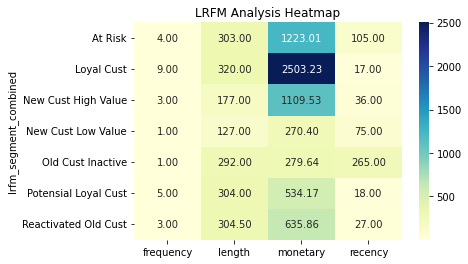

In [ ]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_combined', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [ ]:
import plotly.express as px

color_map = {
    'Loyal Cust' : 'gray',
    'Potensial Loyal Cust' : 'purple',
    'New Cust High Value' : 'pink',
    'New Cust Low Value' : 'blue',
    'Need Attention' : 'green',
    'At Risk' : 'yellow',
    'Reactivated Old Cust' : 'orange',
    'Old Cust Inactive' : 'red',
}

fig = px.scatter_3d(
    df_customer,
    x='recency',
    y='frequency',
    z='monetary',
    color='lrfm_segment_combined',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

**c. K-Means Clustering**

Pada tahapan ini kita akan membiarkan model menemukan pola dari nila l_score, r_score, f_score, dan m_score. Untuk kasus ini kita akan coba membagi segmen ke dalam 3 cluster.

In [ ]:
# import library yang dibutuhkan
from sklearn.cluster import KMeans

# mendefinisikan model kmeans dengan jumlah cluster 3
model = KMeans(n_clusters=3, random_state=42)

# fitting model
model.fit(df_customer.loc[:, 'length':'monetary'])

# menambahkan label
df_customer['lrfm_segment_clustering'] = model.labels_.astype(str)
df_customer.sample(5, random_state=42)

,length,recency,frequency,monetary,l_score,r_score,f_score,m_score,lrfm_score_total,lrfm_segment_total,lrfm_score_combined,lrfm_segment_combined,lrfm_segment_clustering
CustomerID,,,,,,,,,,,,,
15110,320,25,7,970.25,4,3,4,3,14,Platinum,4343,Loyal Cust,0
17655,286,12,6,1962.84,3,4,4,4,15,Platinum,3444,Loyal Cust,0
18200,107,107,1,163.80,1,2,1,1,5,Bronze,1211,New Cust Low Value,0
12573,229,229,1,160.54,2,1,1,1,5,Bronze,2111,New Cust Low Value,0
15797,321,97,4,2207.40,4,2,3,4,13,Gold,4234,At Risk,0


Kita akan coba tampilkan karakteristik dari setiap segment dalam bentuk visualisasi sebagai berikut:

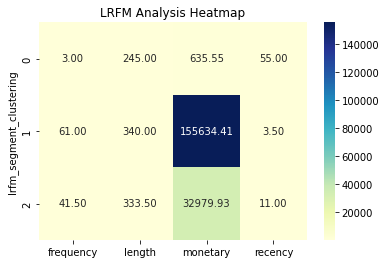

In [ ]:
lrfm_heatmap = df_customer.pivot_table(index='lrfm_segment_clustering', values=['length', 'recency', 'frequency', 'monetary'], aggfunc='median')

# Create the heatmap
sns.heatmap(lrfm_heatmap, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('LRFM Analysis Heatmap')
plt.show()

In [ ]:
import plotly.express as px

color_map = {
    '0' : 'red',
    '1' : 'green',
    '2' : 'blue',
}

fig = px.scatter_3d(
    df_customer,
    x='recency',
    y='frequency',
    z='monetary',
    color='lrfm_segment_clustering',
    color_discrete_map=color_map,
)

fig.update_traces(marker_size = 3)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
                    'text': "RFM segmentation",
                    'y':0.97,
                    'x':0.45,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                    legend=dict(
                      yanchor="top",
                      y=0.97,
                      xanchor="left",
                      x=0.70,
                      itemsizing='constant',
                      itemwidth = 30))

fig.update_xaxes(tickformat=".0f")

Selanjutnya kita dapat membuat summary dan rekomendasi dari hasil di atas. Untuk tahapan ini silakan dikerjakan oleh siswa.

